<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #029db9;
          text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
          text-align:center;
          margin: 0 auto;
          padding:10px; ">
        Trash Type Detection usnig CNN
    </h2>

<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=img/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Rep&uacute;blica Federativa do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="img/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

---

# Fundamentos de Inteligência Artificial
## Trabalho Prático II: Redes Neurais

_Professor Dr. Edjard Mota_

**Alunos:**  `Yago Lobato, Daniel Trindade, Nathã Barbosa, Matheus Santarém, Emanuel Andriola e Cristiano Cardoso ` <br>
**E-mail:** `yagobrlobato@icomp.ufam.edu.br, daniel.trindade@icomp.ufam.edu.br, NathaBarbosa@icomp.ufam.edu.br, matheus.santarem@icomp.ufam.edu.br, Emanuel.moraes@icomp.ufam.edu.br, cristiano.lima@icomp.ufam.edu.br`

<div style="max-width: 100%;">
  <img src="https://lepageandsons.com/wp-content/uploads/2021/04/Garbage-Depositphotos_180449132_xl-2015-1210x423.jpg" style="width: 100%; height: auto;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
</div>

<a id="tc"></a>
       
<p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);
          background-size: 40% auto;
          font-family:camtasia;
          font-size:300%;
          font-weight: bold;
          color: #ffffff;
          text-align:center;
          text-shadow: 0px 0px 10px #000000;
          margin: 0 auto;
          border-radius:10px;
          padding:15px;
          box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
        Table of Content
    </p>

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

* <a href="#import" style="color: #208b9f; text-decoration: none;">Step 1 | Import Libraries</a>
* <a href="#read" style="color: #208b9f; text-decoration: none;">Step 2 | Reading Files</a>
* <a href="#gen" style="color: #208b9f; text-decoration: none;">Step 3 | Generate Data</a>
* <a href="#tt" style="color: #208b9f; text-decoration: none;">Step 4 | Split Train & Test Files</a>
* <a href="#arch" style="color: #208b9f; text-decoration: none;">Step 5 | Network Architecture</a>
* <a href="#compiler" style="color: #208b9f; text-decoration: none;">Step 6 | Compiler</a>
* <a href="#train" style="color: #208b9f; text-decoration: none;">Step 7 | Train Model</a>
* <a href="#evaluate" style="color: #208b9f; text-decoration: none;">Step 8 | Model Evaluation</a>
* <a href="#use" style="color: #208b9f; text-decoration: none;">Step 9 | using Model</a>

<a id="import"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740); background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px; padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 1 | Import Libraries</p>

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras.utils as utils
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.utils import plot_model
from   tensorflow.keras.callbacks import ModelCheckpoint
from   pathlib import Path
from   tensorflow.keras import models, layers, optimizers
from   sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub

In [ ]:
warnings.filterwarnings("ignore")

📄 [Back to Tabel of Contents](#tc)
<a id="read"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 2 | Reading Files</p>

In [ ]:
# Download latest version
data_path = kagglehub.dataset_download("asdasdasasdas/garbage-classification")

print("Path to dataset files:", data_path)

Using Colab cache for faster access to the 'garbage-classification' dataset.
Path to dataset files: /kaggle/input/garbage-classification


In [ ]:
# Data Classes
print(os.listdir(data_path))

['one-indexed-files-notrash_val.txt', 'one-indexed-files-notrash_train.txt', 'Garbage classification', 'garbage classification', 'zero-indexed-files.txt', 'one-indexed-files.txt', 'one-indexed-files-notrash_test.txt']


In [ ]:
print(os.listdir(data_path+'/Garbage classification/Garbage classification'))

['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']


In [ ]:
data_path = data_path+'/Garbage classification/Garbage classification'

In [ ]:
main_folder_path = Path(data_path)

all_folders = [d for d in main_folder_path.glob('**/') if d.is_dir()]

# Count number of files in each class
data = []
for folder in all_folders:
    folder_name = folder.name
    file_count = len(list(folder.glob('*.*')))
    if folder_name != data_path:
        data.append({'Folder Name': folder_name, 'File Count': file_count})

count = pd.DataFrame(data)

count = count.set_index('Folder Name')
count

,File Count
Folder Name,
Garbage classification,0
metal,410
glass,501
paper,594
trash,137
cardboard,403
plastic,482


In [ ]:
print(f'Total {count.sum()}')

Total File Count    2527
dtype: int64


In [ ]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(os.path.basename(item_dir))

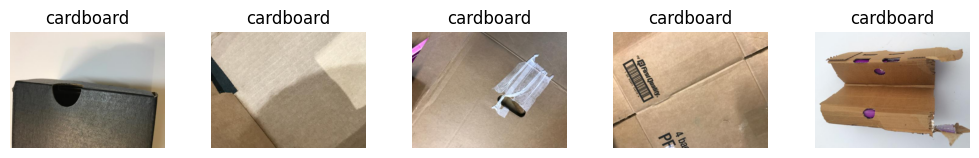

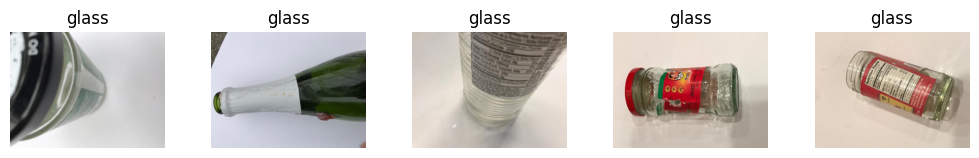

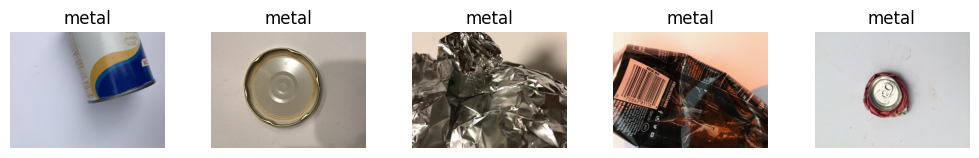

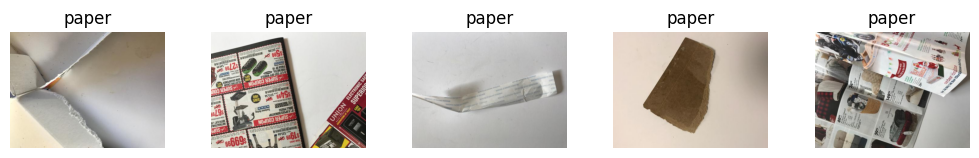

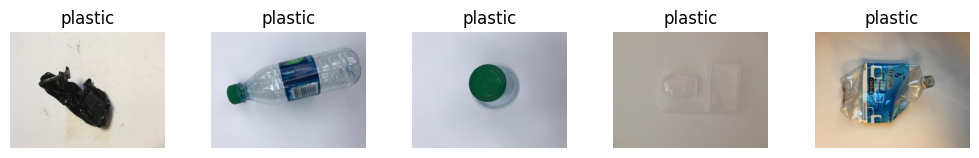

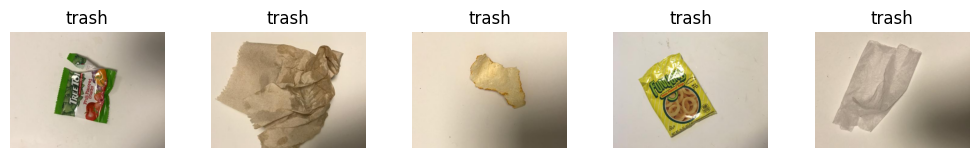

In [ ]:
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

📄 [Back to Tabel of Contents](#tc)
<a id="gen"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 3 | Generate Data</p>

In [ ]:
# Define variable for requirements
batch_size = 32
target_size = (180, 180)
validation_split = 0.15

In [ ]:
# Data Generators
train_img_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split=validation_split,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         zoom_range = 0.5,
                                         width_shift_range = 0.3,
                                         height_shift_range = 0.3,
                                         rotation_range=50,
                                         shear_range = 0.3,
                                         fill_mode='nearest'
                                        )

test_data_img_generator = ImageDataGenerator(rescale=1./255,
                                             validation_split=validation_split
                                            )

📄 [Back to Tabel of Contents](#tc)
<a id="tt"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 4 | Split Train & Test Files</p>

In [ ]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [ ]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 377 images belonging to 6 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Pega as classes do seu gerador de treino
class_labels = train_data.classes

# Calcula os pesos
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

# Converte para um dicionário
class_weight_dict = dict(enumerate(class_weights))
print(f"Pesos de classe calculados: {class_weight_dict}")

Pesos de classe calculados: {0: np.float64(1.0447035957240038), 1: np.float64(0.8411580594679187), 2: np.float64(1.0267430754536773), 3: np.float64(0.7095709570957096), 4: np.float64(0.8739837398373984), 5: np.float64(3.0626780626780628)}


📄 [Back to Tabel of Contents](#tc)
<a id="arch"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 5 | Network Architecture</p>

In [ ]:

model = Sequential()
model.add(ZeroPadding2D(padding=(1, 1), input_shape=(target_size[0], target_size[1], 3)))

# Aumentamos a capacidade aqui
model.add(Conv2D(64, (3, 3), activation='relu'))  # <-- MUDANÇA: 32 para 64
model.add(layers.Dropout(0.2)) # <-- MUDANÇA: 0.3 para 0.2
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) # <-- MUDANÇA: 64 para 128
model.add(layers.Dropout(0.2)) # <-- MUDANÇA: 0.3 para 0.2
model.add(MaxPool2D((2, 2)))

# O resto continua igual
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

print(">>> Arquitetura do modelo atualizada (mais filtros). <<<")

>>> Arquitetura do modelo atualizada (mais filtros). <<<


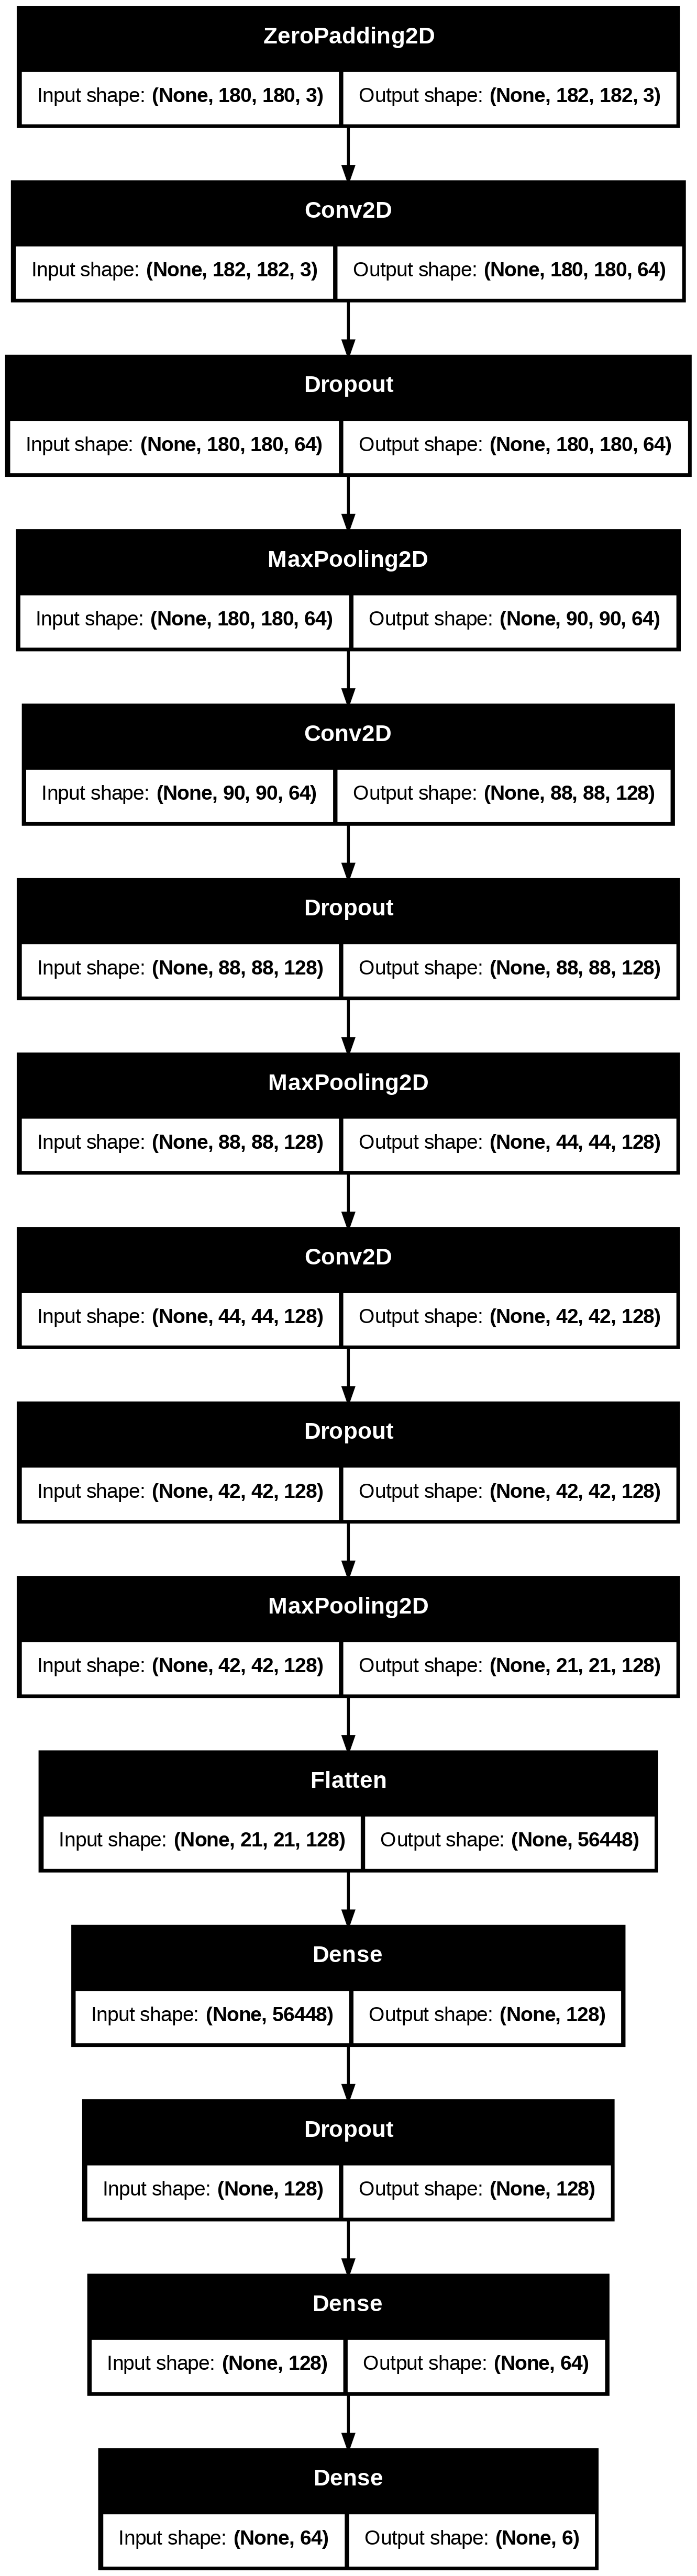

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=False)

📄 [Back to Tabel of Contents](#tc)
<a id="compiler"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 6 | Compiler</p>

In [ ]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [ ]:
MCH = ModelCheckpoint('trash.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),  # diminui a taxa de aprendizado para estabilizar as oscilações
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

📄 [Back to Tabel of Contents](#tc)
<a id="train"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 7 | Train Model</p>

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=90,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH]
                   )

Epoch 1/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - categorical_accuracy: 0.2243 - loss: 1.7937

68/68 ━━━━━━━━━━━━━━━━━━━━ 38s 449ms/step - categorical_accuracy: 0.2247 - loss: 1.7929 - val_categorical_accuracy: 0.2891 - val_loss: 1.7152 - learning_rate: 1.0000e-04
Epoch 2/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - categorical_accuracy: 0.2972 - loss: 1.6202

68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - categorical_accuracy: 0.2977 - loss: 1.6199 - val_categorical_accuracy: 0.3210 - val_loss: 1.6611 - learning_rate: 1.0000e-04
Epoch 3/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - categorical_accuracy: 0.3700 - loss: 1.5511

68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - categorical_accuracy: 0.3700 - loss: 1.5509 - val_categorical_accuracy: 0.3369 - val_loss: 1.6017 - learning_rate: 1.0000e-04
Epoch 4/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - categorical_accuracy: 0.4325 - loss: 1.4566

68/68 ━━━━━━━━━━━━━━━━━━━━ 26s 383ms/step - categorical_accuracy: 0.4323 - loss: 1.4565 - val_categorical_accuracy: 0.3289 - val_loss: 1.5662 - learning_rate: 1.0000e-04
Epoch 5/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - categorical_accuracy: 0.4321 - loss: 1.4110

68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 361ms/step - categorical_accuracy: 0.4320 - loss: 1.4109 - val_categorical_accuracy: 0.3634 - val_loss: 1.5615 - learning_rate: 1.0000e-04
Epoch 6/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - categorical_accuracy: 0.4545 - loss: 1.3844

68/68 ━━━━━━━━━━━━━━━━━━━━ 25s 363ms/step - categorical_accuracy: 0.4546 - loss: 1.3843 - val_categorical_accuracy: 0.3740 - val_loss: 1.5296 - learning_rate: 1.0000e-04
Epoch 7/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - categorical_accuracy: 0.4745 - loss: 1.3527

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - categorical_accuracy: 0.4744 - loss: 1.3528 - val_categorical_accuracy: 0.4032 - val_loss: 1.5235 - learning_rate: 1.0000e-04
Epoch 8/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - categorical_accuracy: 0.4436 - loss: 1.3674

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.4439 - loss: 1.3671 - val_categorical_accuracy: 0.3979 - val_loss: 1.4953 - learning_rate: 1.0000e-04
Epoch 9/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.4896 - loss: 1.2946 - val_categorical_accuracy: 0.3767 - val_loss: 1.5003 - learning_rate: 1.0000e-04
Epoch 10/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - categorical_accuracy: 0.4932 - loss: 1.3256

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 354ms/step - categorical_accuracy: 0.4932 - loss: 1.3252 - val_categorical_accuracy: 0.4403 - val_loss: 1.4536 - learning_rate: 1.0000e-04
Epoch 11/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - categorical_accuracy: 0.5152 - loss: 1.2695 - val_categorical_accuracy: 0.4377 - val_loss: 1.4714 - learning_rate: 1.0000e-04
Epoch 12/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - categorical_accuracy: 0.5189 - loss: 1.2482 - val_categorical_accuracy: 0.3926 - val_loss: 1.5144 - learning_rate: 1.0000e-04
Epoch 13/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - categorical_accuracy: 0.4913 - loss: 1.2707

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 354ms/step - categorical_accuracy: 0.4916 - loss: 1.2707 - val_categorical_accuracy: 0.4324 - val_loss: 1.4504 - learning_rate: 1.0000e-04
Epoch 14/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - categorical_accuracy: 0.4989 - loss: 1.2730

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.4992 - loss: 1.2725 - val_categorical_accuracy: 0.4350 - val_loss: 1.4377 - learning_rate: 1.0000e-04
Epoch 15/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - categorical_accuracy: 0.5090 - loss: 1.2305

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - categorical_accuracy: 0.5091 - loss: 1.2304 - val_categorical_accuracy: 0.4589 - val_loss: 1.3970 - learning_rate: 1.0000e-04
Epoch 16/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - categorical_accuracy: 0.5420 - loss: 1.1891 - val_categorical_accuracy: 0.4430 - val_loss: 1.4260 - learning_rate: 1.0000e-04
Epoch 17/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 42s 359ms/step - categorical_accuracy: 0.5466 - loss: 1.2017 - val_categorical_accuracy: 0.4403 - val_loss: 1.4091 - learning_rate: 1.0000e-04
Epoch 18/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - categorical_accuracy: 0.5479 - loss: 1.1795 - val_categorical_accuracy: 0.5119 - val_loss: 1.3996 - learning_rate: 1.0000e-04
Epoch 19/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - categorical_accuracy: 0.5286 - loss: 1.2098

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 356ms/step - categorical_accuracy: 0.5288 - loss: 1.2096 - val_categorical_accuracy: 0.4695 - val_loss: 1.3874 - learning_rate: 1.0000e-04
Epoch 20/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - categorical_accuracy: 0.5343 - loss: 1.2186 - val_categorical_accuracy: 0.4430 - val_loss: 1.3914 - learning_rate: 1.0000e-04
Epoch 21/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - categorical_accuracy: 0.5482 - loss: 1.2062 - val_categorical_accuracy: 0.4801 - val_loss: 1.3946 - learning_rate: 1.0000e-04
Epoch 22/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - categorical_accuracy: 0.5462 - loss: 1.1649

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - categorical_accuracy: 0.5463 - loss: 1.1648 - val_categorical_accuracy: 0.4854 - val_loss: 1.3747 - learning_rate: 1.0000e-04
Epoch 23/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - categorical_accuracy: 0.5575 - loss: 1.1427

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - categorical_accuracy: 0.5575 - loss: 1.1426 - val_categorical_accuracy: 0.4748 - val_loss: 1.3610 - learning_rate: 1.0000e-04
Epoch 24/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - categorical_accuracy: 0.5786 - loss: 1.1146 - val_categorical_accuracy: 0.4881 - val_loss: 1.3792 - learning_rate: 1.0000e-04
Epoch 25/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 341ms/step - categorical_accuracy: 0.5792 - loss: 1.1055 - val_categorical_accuracy: 0.4801 - val_loss: 1.3645 - learning_rate: 1.0000e-04
Epoch 26/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - categorical_accuracy: 0.5821 - loss: 1.0976

68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 337ms/step - categorical_accuracy: 0.5819 - loss: 1.0980 - val_categorical_accuracy: 0.5119 - val_loss: 1.3456 - learning_rate: 1.0000e-04
Epoch 27/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - categorical_accuracy: 0.5487 - loss: 1.1656

68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 339ms/step - categorical_accuracy: 0.5491 - loss: 1.1648 - val_categorical_accuracy: 0.4801 - val_loss: 1.3444 - learning_rate: 1.0000e-04
Epoch 28/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - categorical_accuracy: 0.5765 - loss: 1.0926

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.5765 - loss: 1.0927 - val_categorical_accuracy: 0.5119 - val_loss: 1.3213 - learning_rate: 1.0000e-04
Epoch 29/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - categorical_accuracy: 0.6021 - loss: 1.0682 - val_categorical_accuracy: 0.4483 - val_loss: 1.3659 - learning_rate: 1.0000e-04
Epoch 30/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.5824 - loss: 1.0965 - val_categorical_accuracy: 0.5438 - val_loss: 1.3587 - learning_rate: 1.0000e-04
Epoch 31/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - categorical_accuracy: 0.5902 - loss: 1.0736 - val_categorical_accuracy: 0.5040 - val_loss: 1.3569 - learning_rate: 1.0000e-04
Epoch 32/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - categorical_accuracy: 0.5825 - loss: 1.1040

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.5826 - loss: 1.1038 - val_categorical_accuracy: 0.5279 - val_loss: 1.3140 - learning_rate: 1.0000e-04
Epoch 33/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - categorical_accuracy: 0.5801 - loss: 1.1017

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - categorical_accuracy: 0.5802 - loss: 1.1012 - val_categorical_accuracy: 0.5252 - val_loss: 1.3106 - learning_rate: 1.0000e-04
Epoch 34/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - categorical_accuracy: 0.5974 - loss: 1.0779 - val_categorical_accuracy: 0.5305 - val_loss: 1.3145 - learning_rate: 1.0000e-04
Epoch 35/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.6067 - loss: 1.0485 - val_categorical_accuracy: 0.5305 - val_loss: 1.3340 - learning_rate: 1.0000e-04
Epoch 36/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - categorical_accuracy: 0.5914 - loss: 1.0508 - val_categorical_accuracy: 0.5199 - val_loss: 1.3291 - learning_rate: 1.0000e-04
Epoch 37/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.6201 - loss: 1.0396 - val_categorical_accuracy: 0.4854 - val_loss: 1.3204 - learning_rate: 1.0000e-04
Epoch 38/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - categorical_accuracy: 0.6130 - loss: 1.0403

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 355ms/step - categorical_accuracy: 0.6129 - loss: 1.0403 - val_categorical_accuracy: 0.5544 - val_loss: 1.2736 - learning_rate: 1.0000e-04
Epoch 39/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - categorical_accuracy: 0.6258 - loss: 1.0305 - val_categorical_accuracy: 0.5146 - val_loss: 1.3127 - learning_rate: 1.0000e-04
Epoch 40/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - categorical_accuracy: 0.6109 - loss: 1.0559

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - categorical_accuracy: 0.6109 - loss: 1.0557 - val_categorical_accuracy: 0.5332 - val_loss: 1.2713 - learning_rate: 1.0000e-04
Epoch 41/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - categorical_accuracy: 0.6265 - loss: 1.0313 - val_categorical_accuracy: 0.5332 - val_loss: 1.2879 - learning_rate: 1.0000e-04
Epoch 42/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - categorical_accuracy: 0.6071 - loss: 1.0292

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 355ms/step - categorical_accuracy: 0.6072 - loss: 1.0293 - val_categorical_accuracy: 0.5623 - val_loss: 1.2654 - learning_rate: 1.0000e-04
Epoch 43/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - categorical_accuracy: 0.6088 - loss: 0.9828

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 359ms/step - categorical_accuracy: 0.6088 - loss: 0.9832 - val_categorical_accuracy: 0.5199 - val_loss: 1.2636 - learning_rate: 1.0000e-04
Epoch 44/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - categorical_accuracy: 0.6556 - loss: 0.9843

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - categorical_accuracy: 0.6554 - loss: 0.9843 - val_categorical_accuracy: 0.5650 - val_loss: 1.2359 - learning_rate: 1.0000e-04
Epoch 45/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - categorical_accuracy: 0.6100 - loss: 0.9876

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 352ms/step - categorical_accuracy: 0.6103 - loss: 0.9873 - val_categorical_accuracy: 0.5915 - val_loss: 1.2164 - learning_rate: 1.0000e-04
Epoch 46/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.6427 - loss: 0.9805 - val_categorical_accuracy: 0.5279 - val_loss: 1.2204 - learning_rate: 1.0000e-04
Epoch 47/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - categorical_accuracy: 0.6440 - loss: 0.9613

68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - categorical_accuracy: 0.6439 - loss: 0.9614 - val_categorical_accuracy: 0.5597 - val_loss: 1.1746 - learning_rate: 1.0000e-04
Epoch 48/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.6353 - loss: 0.9742 - val_categorical_accuracy: 0.5623 - val_loss: 1.1940 - learning_rate: 1.0000e-04
Epoch 49/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - categorical_accuracy: 0.6339 - loss: 1.0131 - val_categorical_accuracy: 0.5703 - val_loss: 1.1920 - learning_rate: 1.0000e-04
Epoch 50/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 348ms/step - categorical_accuracy: 0.6378 - loss: 0.9506 - val_categorical_accuracy: 0.5570 - val_loss: 1.2093 - learning_rate: 1.0000e-04
Epoch 51/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - categorical_accuracy: 0.6564 - loss: 0.9365 - val_categorical_accuracy: 0.5650 - val_loss: 1.2341 - learning_rate: 1.0000e-04
Epoch 52/90
68/68 ━━━━━━━━━━━━━━━━━━━━ 24s 349ms/step - categorical_accuracy: 0.6702 - loss: 0.9186 - 

#Avaliação final

📄 [Back to Tabel of Contents](#tc)
<a id="evaluate"></a>
       
## <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 8 | Model Evaluation</p>

In [ ]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

Best Validation score is: 0.604774534702301


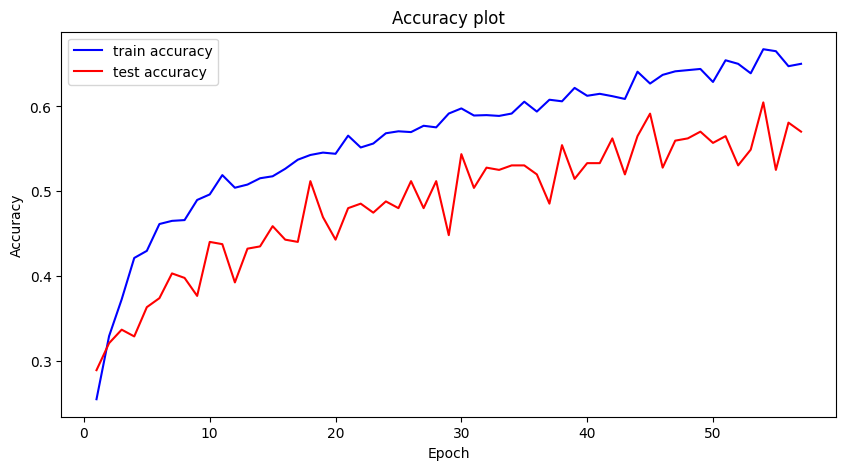

In [ ]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

Found 377 images belonging to 6 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step

=================== Classification Report ===================

              precision    recall  f1-score   support

   cardboard       0.88      0.62      0.73        60
       glass       0.57      0.52      0.54        75
       metal       0.50      0.74      0.60        61
       paper       0.53      0.87      0.66        89
     plastic       0.59      0.22      0.32        72
       trash       0.25      0.05      0.08        20

    accuracy                           0.57       377
   macro avg       0.55      0.50      0.49       377
weighted avg       0.59      0.57      0.54       377


===================== Confusion Matrix =====================



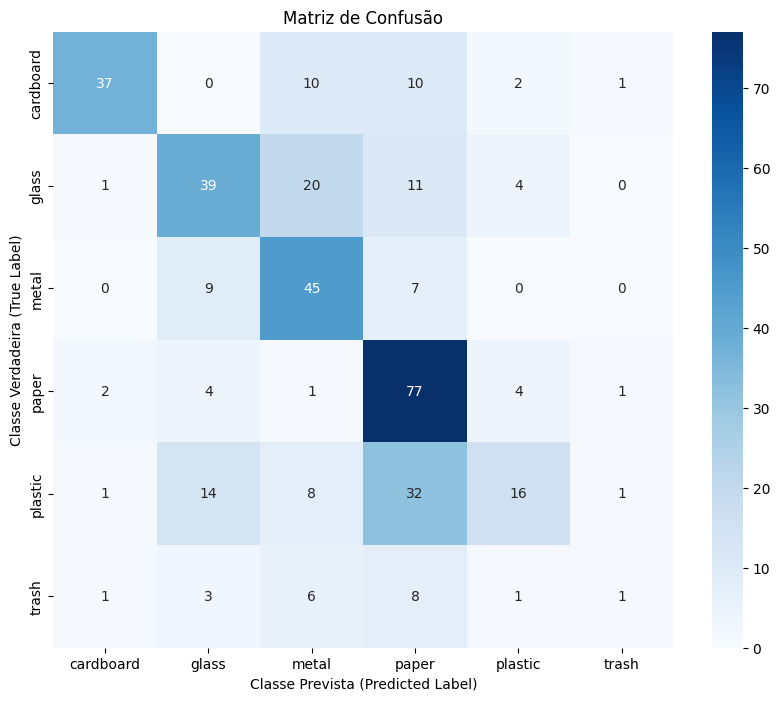

In [ ]:
validation_generator = test_data_img_generator.flow_from_directory(
    data_path,
    subset='validation',
    seed=123,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False
)


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes


class_names = list(validation_generator.class_indices.keys())

print("\n=================== Classification Report ===================\n")
print(classification_report(y_true, y_pred, target_names=class_names))


print("\n===================== Confusion Matrix =====================\n")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão')
plt.ylabel('Classe Verdadeira (True Label)')
plt.xlabel('Classe Prevista (Predicted Label)')
plt.show()

## Conclusão - Impacto do Data Augmentation

Foram testados diferentes cenários de data augmentation:

1. **Sem data augmentation:**  
   - O modelo aprendeu rápido no conjunto de treino, mas a acurácia de validação ficou em torno de 40–45%;  
   - Houve sinais de overfitting (treino continuava melhorando, validação saturava).

2. **Data augmentation muito agressivo:**  
   - Rotações grandes, zoom alto e flips verticais foram aplicados;  
   - O desempenho piorou: o modelo passou a classificar uma grande parte das imagens como `plastic`, e a acurácia de validação caiu para ~25–30%;  
   - Conclusão: augmentations exagerados podem distorcer demais as imagens e dificultar o aprendizado de padrões úteis.

3. **Data augmentation moderado (configuração final):**  
   - Rotações pequenas, shifts leves, zoom moderado e apenas flip horizontal;  
   - A acurácia de validação subiu para cerca de 60–66%;  
   - As curvas de treino/validação ficaram mais estáveis e a matriz de confusão passou a mostrar acertos bem distribuídos entre as classes.

Assim, o data augmentation mostrou-se essencial para reduzir overfitting e melhorar a generalização, desde que usado de forma **calibrada**.

📄 [Back to Tabel of Contents](#tc)
<a id="use"></a>
       
## <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 9 |  Using Model</p>

In [ ]:
classes = train_data.class_indices
classes

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

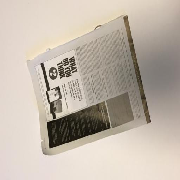

In [ ]:
img = utils.load_img(
    data_path+'/paper/paper1.jpg',
    color_mode='rgb',
    target_size=(180, 180),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img

In [ ]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print(key)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
paper
